[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alexwolson/LabattCARTEBootcamp/blob/master/Intro.ipynb)

# UofT CARTE Labatt ML Bootcamp
#### Python, NumPy, and Scikit-Learn Fundamentals
##### Lab author: Kyle E. C. Booth, kbooth@mie.utoronto.ca, Alex Olson alex.olson@utoronto.ca

Welcome to the CARTE ML Bootcamp! This worksheet is designed to give a quick rundown of some of the tools we will be using in the lab portions of the bootcamp. It is optional, but if you're unfamiliar with data science in Python it will be helpful to familiarise yourself here.

In this lab, we will be using the popular machine learning library [scikit-learn](https://scikit-learn.org/stable/) in tandem with a popular scientific computing library in Python, [NumPy](https://www.numpy.org/), to investigate basic machine learning principles and models. The topics that will be covered in this lab include:
* Introduction to scikit-learn and NumPy
* Exploratory data analysis (EDA)

*Note:* Some other useful Python libraries include [matplotlib](https://matplotlib.org/) (for plotting/graphing) and [Pandas](https://pandas.pydata.org/) (for data analysis), though we won't be going into detail on these in this lab. 

##### Google Colab
This lab will be using Google Colab as a Python development environment. Write your code in *cells* (this is a cell!) and execute your code by pressing the *play* button (next to the cell) or by entering *ctrl+enter*. To format a cell for text, you can select "Markdown" from the dropdown - the default formatting is "Code", which will usually be what you want.

#### Getting started
Let's get started. First, we're going to test that we're able to import the required libraries.  
**>> Run the code in the next cell** to import scikit-learn and NumPy.

In [1]:
import numpy as np
import sklearn 

### NumPy Basics

Great. Let's move on to our next topic: getting a handle on NumPy basics. You can think of NumPy as sort of like a MATLAB for Python (if that helps!). The main object is multidimensional arrays, and these come in particularly handy when working with data and machine learning algorithms.

Let's create a 2x4 array containing the numbers 1 through 8 and conduct some basic operations on it.  
**>> Run the code in the next cell to create and print the array.***

In [2]:
array = np.arange(8).reshape(2,4)
array

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

We can access the shape, number of dimensions, data type, and number of elements in our array as follows:  
*(Tip: use "print()" when you want a cell to output more than one thing, or you want to append text to your output, otherwise the cell will output the last object you call, as in the cell above)*

In [3]:
print ("Shape:", array.shape)
print ("Dimensions:", array.ndim)
print ("Data type:" , array.dtype.name)
print ("Number of elements:", array.size)

Shape: (2, 4)
Dimensions: 2
Data type: int64
Number of elements: 8


If we have a Python list containing a set of numbers, we can use it to create an array:  
*(Tip: if you click on a function call, such as array(), and press "shift+tab" the Notebook will provide you all the details of the function)*

In [4]:
mylist = [0, 1, 1, 2, 3, 5, 8, 13, 21]
myarray = np.array(mylist)
myarray

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21])

And we can do it for nested lists as well, creating multidimensional NumPy arrays:

In [5]:
my2dlist = [[1,2,3],[4,5,6]]
my2darray = np.array(my2dlist)
my2darray

array([[1, 2, 3],
       [4, 5, 6]])

We can also index and slice NumPy arrays like we would do with a Python list or another container object as follows:

In [6]:
array = np.arange(10)
print ("Originally: ", array)
print ("First four elements: ", array[:4]) # Think of this as "everything up to index 4"
print ("After the first four elements: ", array[4:]) #Think of this as "everything from index 4 onwards"
print ("The last element: ", array[-1])

Originally:  [0 1 2 3 4 5 6 7 8 9]
First four elements:  [0 1 2 3]
After the first four elements:  [4 5 6 7 8 9]
The last element:  9


And we can index/slice multidimensional arrays, too.

In [7]:
array = np.array([[1,2,3],[4,5,6]])
print ("Originally: ", array)
print ("First row only: ", array[0])
print ("First column only: ", array[:,0])

Originally:  [[1 2 3]
 [4 5 6]]
First row only:  [1 2 3]
First column only:  [1 4]


#### Sneak preview

Often, when designing a machine learning classifier, it can be useful to compare an array of predictions (0 or 1 values) to another array of true values. We can do this pretty easily in NumPy to compute the *accuracy* (e.g., the number of values that are the same), for example, as follows:

In [8]:
true_values = [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
predictions = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

true_values_array = np.array(true_values)
predictions_array = np.array(predictions)

accuracy = np.sum(true_values_array == predictions_array) / true_values_array.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  70.0 %


In the previous cell, we took two Python lists, converted them to NumPy arrays, and then used a combination of np.sum() and .size to compute the accuracy (proportion of elements that are pairwise equal). A tiny bit more advanced, but demonstrates the power of NumPy arrays.

You'll notice we didn't used nested loops to conduct the comparison, but instead used the np.sum() function. This is an example of a vectorized operation within NumPy that is much more efficient when dealing with large datasets.

### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all. 

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition. 

Each entry in the dataset represents an iris plant, and is categorized as: 

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [9]:
from sklearn.datasets import load_iris
iris_data = load_iris()
feature_data = iris_data.data

**YOUR TURN:** "feature_data" now contains the feature data for all of the iris samples.

* What is the shape of this feature data? *(150,4)*
* The data type? *float64*
* How many samples are there? (How many rows are in the feature data?) *150*
* How many features are there? (How many columns are in the feature data?) *4*

All of the code you need can be found above.

In [10]:
print(f'Feature data shape: {feature_data.shape}')
print(f'data type: {feature_data.dtype.name}')
print(f'Number of samples: {feature_data.shape[0]}')
print(f'Number of features: {feature_data.shape[1]}')

Feature data shape: (150, 4)
data type: float64
Number of samples: 150
Number of features: 4


Next, we will save the target classification data in a similar fashion.

In [11]:
target_data = iris_data.target
target_names = iris_data.target_names

**YOUR TURN:**
* What values are in "target_data"? *integers corresponding to the labels*
* What is the data type? *int64*
* What values are in "target_names"? *names of the labels*
* What is the data type? *str320*
* How many samples are of type "setosa"? *50*

In [12]:
print(target_data)
print(f'Data type: {target_data.dtype.name}')
print(target_names)
print(f'Data type: {target_names.dtype.name}')
print(sum(target_data == 0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Data type: int64
['setosa' 'versicolor' 'virginica']
Data type: str320
50


We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/), a powerful plotting library within Python, to accomplish this.

For example, let's plot sepal width vs. sepal length.


In [13]:
import matplotlib.pyplot as plt

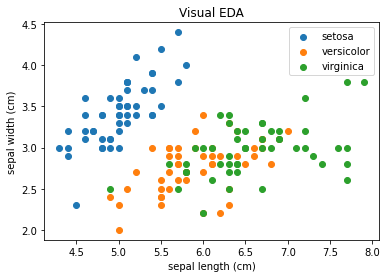

In [14]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]

plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA"); #You can put a semicolon at the end of the line to tell the notebook not to print its result

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two. 

**YOUR TURN:** 
* Which of the iris classes is seperable based on sepal characteristics? *Setosa*
* Which of the iris classes is not? *Versicolor and virginica*
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not? *no - it is four dimensional*

Congratulations - you are now warmed up with the tools we are going to be using in this bootcamp! If you have time, continue on to the first lab.